In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

### Investigating dataset

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Dropping RowNumber column as it is not significant for analysis
df.drop(['RowNumber'], axis=1, inplace=True)

In [5]:
# Extracting column names where there are NaN values
[features for features in df.columns if df[features].isnull().sum()>0]

[]

There are no missing values in this dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### EDA

Text(0.5, 1.0, 'Age distribution')

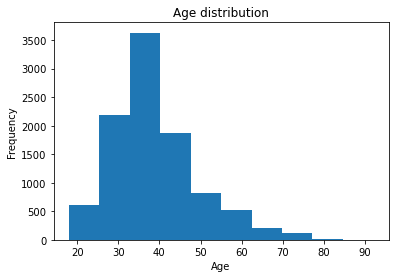

In [7]:
# Exploring Age distribution
df['Age'].plot(kind='hist')
plt.xlabel('Age')
plt.title('Age distribution')

In [8]:
df['Age'].mode()

0    37
dtype: int64

Data distribution is right skewed with maximum people falling in 35 to 40 age group

<AxesSubplot:xlabel='Gender', ylabel='Age'>

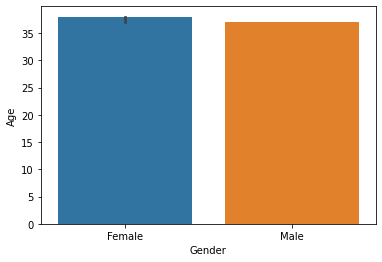

In [9]:
sns.barplot(x='Gender', y='Age', data=df, estimator=np.median)

C:\Users\syedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

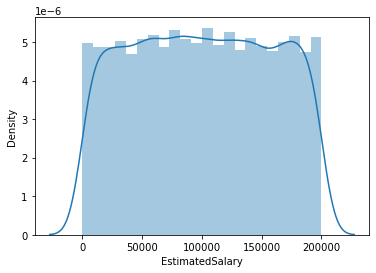

In [10]:
# Plotting EstimatedSalary distribution using seaborn
sns.distplot(df['EstimatedSalary'])

Salary data has uniform distribution

C:\Users\syedr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Credit Score Distribution')

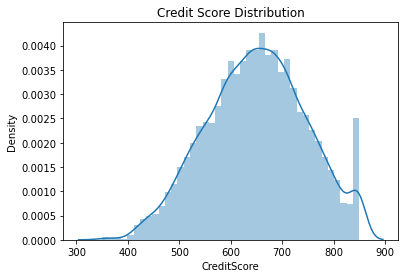

In [11]:
sns.distplot(df['CreditScore']);
plt.title('Credit Score Distribution')

Has somewhat of a normal distribution

<AxesSubplot:xlabel='Gender', ylabel='IsActiveMember'>

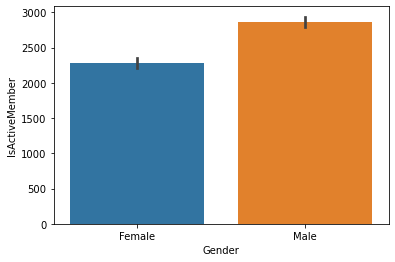

In [12]:
sns.barplot(x='Gender', y='IsActiveMember', data=df, estimator=sum)

Both Genders are equally active

<AxesSubplot:xlabel='Gender', ylabel='HasCrCard'>

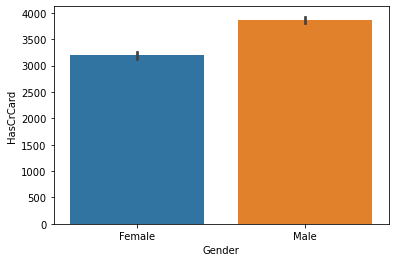

In [13]:
sns.barplot(x='Gender', y='HasCrCard', data=df, estimator=sum)

Male customers tend to use credit card more than females for this dataset

<AxesSubplot:xlabel='Gender', ylabel='NumOfProducts'>

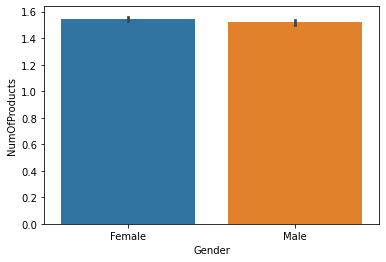

In [14]:
sns.barplot(x='Gender', y='NumOfProducts', data=df, estimator=np.mean)

Both gender then to use almost equal number of features provided by bank

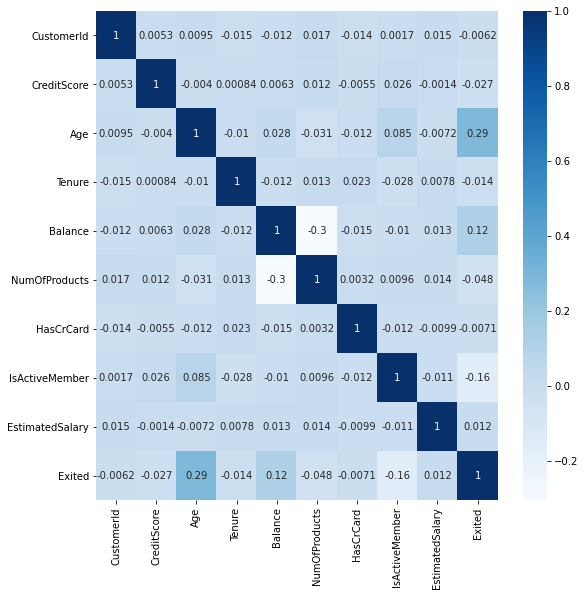

In [15]:
# Finding correlation between features
corr = df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True, cmap='Blues');

### Feature Engineering

In [16]:
# Mapping gender to 0 and 1 to be able to use while training our model
df['Gender'] = df['Gender'].map({'Female':1,'Male':0})

In [17]:
# Creating dummy variables for Geography column
# We could drop the first column as there are 3 distinct values but can be represented with just two columns
df_dummies = pd.get_dummies(df['Geography'])

In [18]:
df_dummies.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [19]:
df_final = pd.concat([df,df_dummies], axis=1)

In [20]:
df_final.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [21]:
# Dropping Geography column as it is no longer required
df_final.drop('Geography', axis=1, inplace=True)